<img src="airbnb_logo.jpg" />

# Data exploration on Airbnb Madrid (Spain)

## Overview of the study

We are analyzing 20.837 listings of Airbnb Madrid. The satisfaction level of any customer and the pricings are subjective things and they depend on multitude of factors. Those factors may be qualitative and quantitative: room type, number of bedrooms, number of accomodates allowed, number of host listings, reviews, cancellation policy etc.

All of this listings generate a lot of data, data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

The specific objective of this project is to analyze these parameter’s impact on the dependent factors, price and overall satisfaction level of customers.

https://www.kaggle.com/rusiano/madrid-airbnb-data

## Data description:

room_id: A unique number identifying an Airbnb listing.

host_id: A unique number identifying an Airbnb host.

accomodates: The number of guests a listing can accommodate.

room_type: One of “Entire home/apt”, “Private room”, or “Shared room”.

bathrooms: The number of bathrooms a listing offers.

bedrooms: The number of bedrooms a listing offers.

beds: The number of beds a listing offers.

price: The price (in $US) for a night stay.

minimum_nights: The minimum stay for a visit, as posted by the host.

number_of_reviews: The number of reviews that a listing has received. Airbnb has said that 70% of visits end up with a review, so the number of reviews can be used to estimate the number of visits.

reviews_per_month: The number of reviews that a listing has received per month.

host_listings_count: The number of listings for a particular host.

availability_365: The number of days for which a particular host is available in a year.


In [1]:
#Importing necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

sns.set(style="ticks")

import plotly
plotly.offline.init_notebook_mode()
import plotly.graph_objects as go

### Downloading the dataset and check information

In [2]:
#Listing: summarized information

airb_list = pd.read_csv('airbnb_file/listings.csv')

airb_detailed = pd.read_csv('airbnb_file/listings_detailed.csv', sep=',')



In [3]:
#Check the information available in the short file. We see that we don't have all the information we are going to use so let's check the extensed file.

airb_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Data columns (total 16 columns):
id                                20837 non-null int64
name                              20832 non-null object
host_id                           20837 non-null int64
host_name                         20822 non-null object
neighbourhood_group               20837 non-null object
neighbourhood                     20837 non-null object
latitude                          20837 non-null float64
longitude                         20837 non-null float64
room_type                         20837 non-null object
price                             20837 non-null int64
minimum_nights                    20837 non-null int64
number_of_reviews                 20837 non-null int64
last_review                       16183 non-null object
reviews_per_month                 16183 non-null float64
calculated_host_listings_count    20837 non-null int64
availability_365                  20837 non-null int64

In [4]:
airb_detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 16.9+ MB


In [5]:
#Check all the columns of we have in order to select those we are ging to use

col_name = []
for col in airb_detailed.columns:
    col_name.append(col)
print(col_name)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [6]:
#The columns latitude y longitude are exchange so we have to rename the columns

airb_list.rename(columns={'latitude':'longitude',
                          'longitude':'latitude'},
                 inplace=True)

airb_detailed.rename(columns={'latitude':'longitude',
                          'longitude':'latitude'},
                 inplace=True)

In [7]:
#Make a copy of the dataframe listings_detailed with the columns that we are going to use for the analysis

new_airb = airb_detailed.filter(['id', 'neighbourhood_group_cleansed', 
                                'host_neighbourhood','room_type', 'accommodates', 
                                'bedrooms','price', 'cancellation_policy' ,'review_scores_value',
                                'reviews_per_month', 'latitude', 'longitude'], 
                                axis=1)
new_airb.head()

id neighbourhood_group_cleansed host_neighbourhood        room_type  \
0   6369                    Chamartín     Hispanoamérica     Private room   
1  21853                       Latina             Aluche     Private room   
2  24805                       Centro           Malasaña  Entire home/apt   
3  24836                       Centro           Justicia  Entire home/apt   
4  26825                   Arganzuela            Legazpi     Private room   

   accommodates  bedrooms    price          cancellation_policy  \
0             2       1.0   $70.00                     flexible   
1             1       1.0   $17.00  strict_14_with_grace_period   
2             3       0.0   $80.00                     moderate   
3             4       2.0  $115.00                     moderate   
4             1       1.0   $25.00  strict_14_with_grace_period   

   review_scores_value  reviews_per_month  latitude  longitude  
0                 10.0               0.56  -3.67763   40.45628  
1                  9.0               0.55  -3.74084   40.40341  
2                 10.0               0.03  -3.70395   40.42202  
3                 10.0               0.63  -3.69764   40.41995  
4                 10.0               1.19  -3.69011   40.38985

In [8]:
#Rename other columns
new_airb.rename(columns= {'neighbourhood_group_cleansed': 'district'}, inplace=True)

In [9]:
new_airb.head(3)

id   district host_neighbourhood        room_type  accommodates  \
0   6369  Chamartín     Hispanoamérica     Private room             2   
1  21853     Latina             Aluche     Private room             1   
2  24805     Centro           Malasaña  Entire home/apt             3   

   bedrooms   price          cancellation_policy  review_scores_value  \
0       1.0  $70.00                     flexible                 10.0   
1       1.0  $17.00  strict_14_with_grace_period                  9.0   
2       0.0  $80.00                     moderate                 10.0   

   reviews_per_month  latitude  longitude  
0               0.56  -3.67763   40.45628  
1               0.55  -3.74084   40.40341  
2               0.03  -3.70395   40.42202

In [10]:
#Check information of the new datarame that we are going to use for the analysis
new_airb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Data columns (total 12 columns):
id                     20837 non-null int64
district               20837 non-null object
host_neighbourhood     16733 non-null object
room_type              20837 non-null object
accommodates           20837 non-null int64
bedrooms               20828 non-null float64
price                  20837 non-null object
cancellation_policy    20837 non-null object
review_scores_value    15868 non-null float64
reviews_per_month      16183 non-null float64
latitude               20837 non-null float64
longitude              20837 non-null float64
dtypes: float64(5), int64(2), object(5)
memory usage: 1.9+ MB


We have 20.837 entries with numeric and categorical variables. First, we check the null values and the price format that we have to change if we want to work with it as a numeric value.

In [11]:
#Missing values
new_airb.isnull().sum()

id                        0
district                  0
host_neighbourhood     4104
room_type                 0
accommodates              0
bedrooms                  9
price                     0
cancellation_policy       0
review_scores_value    4969
reviews_per_month      4654
latitude                  0
longitude                 0
dtype: int64

In [12]:
new_airb = new_airb.dropna(axis=0, subset=['host_neighbourhood'])

In [13]:
new_airb = new_airb.dropna(axis=0, subset=['review_scores_value'])

In [14]:
new_airb.isnull().sum()

id                     0
district               0
host_neighbourhood     0
room_type              0
accommodates           0
bedrooms               3
price                  0
cancellation_policy    0
review_scores_value    0
reviews_per_month      0
latitude               0
longitude              0
dtype: int64

In [15]:
#We decided to replace null values with 0, because there are only 3 missing values
new_airb.fillna({'bedrooms': 0}, inplace=True)

In [16]:
new_airb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13035 entries, 0 to 20720
Data columns (total 12 columns):
id                     13035 non-null int64
district               13035 non-null object
host_neighbourhood     13035 non-null object
room_type              13035 non-null object
accommodates           13035 non-null int64
bedrooms               13035 non-null float64
price                  13035 non-null object
cancellation_policy    13035 non-null object
review_scores_value    13035 non-null float64
reviews_per_month      13035 non-null float64
latitude               13035 non-null float64
longitude              13035 non-null float64
dtypes: float64(5), int64(2), object(5)
memory usage: 1.3+ MB


In [17]:
#Check price column
print(new_airb.price)

0         $70.00
1         $17.00
2         $80.00
3        $115.00
4         $25.00
          ...   
20631     $70.00
20666     $19.00
20675     $80.00
20680     $27.00
20720     $39.00
Name: price, Length: 13035, dtype: object


In [18]:
#Convert price into a float

new_airb.price = new_airb.price.replace({",":""}, regex=True)

euro = lambda x: float(x[1:-1])
new_airb.price = new_airb.price.apply(euro)

In [19]:
print(new_airb.price.dtype)

float64


## Visualizing data

### Geographical visualization

It is much easier to see high density areas.

Text(0.0, 1.0, 'Madrid Airbnb listings')

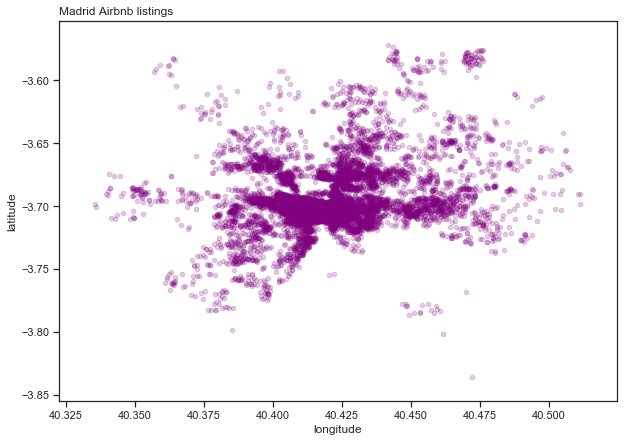

In [54]:
new_airb.plot(kind='scatter', x='longitude', y='latitude', alpha= 0.2, figsize=(10,7), c='purple')
plt.title('Madrid Airbnb listings', loc='left')


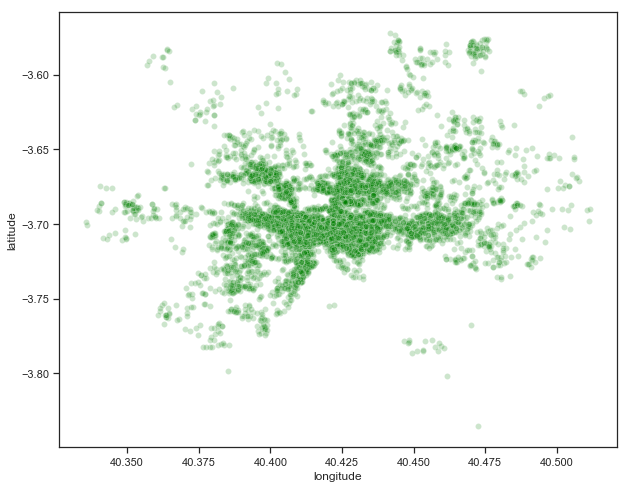

In [52]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.scatterplot(x="longitude", y="latitude", sizes=(10, 200),
data= new_airb, color='green', alpha= 0.2)


Show the listings in a map (see 'Mapas_airbnb' jupyter notebook)

## Box Plot

### Accomodates (number of guests a listing can accommodate, capacidad)

In [86]:
new_airb.accommodates.describe()

count    13035.000000
mean         3.533410
std          2.083426
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

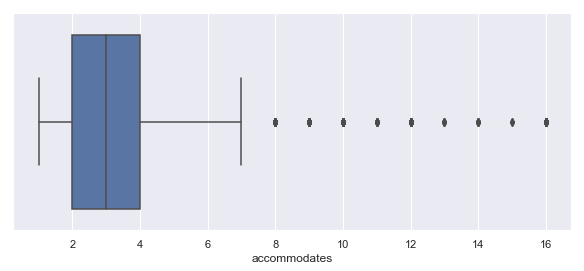

In [56]:
sns.set(rc={'figure.figsize':(10,4)},)
sns.boxplot(data= new_airb, x='accommodates', orient= 'h')

### Review Score Values

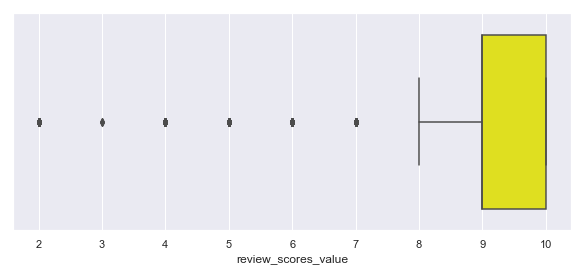

In [87]:
sns.set(rc={'figure.figsize':(10,4)})

sns.boxplot(data= new_airb , x='review_scores_value', orient= 'h', color= 'yellow')

## Categorical variables

In [80]:
#ROOM TYPE
room_t = new_airb.room_type.value_counts() / len(new_airb)
room_t

Entire home/apt    0.676410
Private room       0.289912
Hotel room         0.023475
Shared room        0.010203
Name: room_type, dtype: float64

Text(0.0, 1.0, 'Room type distribution')

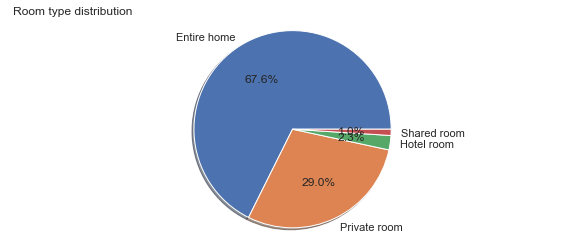

In [72]:
plt.pie(room_t, autopct= '%1.1f%%', shadow= True, labels=['Entire home', 'Private room', 'Hotel room', 'Shared room'])
plt.axis('equal')
plt.title('Room type distribution', loc= 'left')


In [78]:
#District
district = new_airb.district.value_counts()
district

Centro                   7001
Salamanca                 836
Chamberí                  726
Arganzuela                691
Tetuán                    463
Retiro                    425
Latina                    350
Puente de Vallecas        333
Carabanchel               331
Ciudad Lineal             315
Moncloa - Aravaca         308
Chamartín                 307
Hortaleza                 199
Usera                     181
San Blas - Canillejas     166
Fuencarral - El Pardo     135
Barajas                    83
Villaverde                 76
Moratalaz                  55
Villa de Vallecas          36
Vicálvaro                  18
Name: district, dtype: int64

In [85]:
#Cancellation policy
cancel_pol = new_airb.cancellation_policy.value_counts() / len(new_airb)
cancel_pol

strict_14_with_grace_period    0.411354
moderate                       0.343690
flexible                       0.238742
super_strict_30                0.004833
super_strict_60                0.001381
Name: cancellation_policy, dtype: float64

## Contingency tables

In [73]:
#Cancellation policy and Score value

pd.crosstab(new_airb.cancellation_policy, new_airb.review_scores_value)

review_scores_value          2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
cancellation_policy                                                           
flexible                       16     1    12     6    51    69   337  1189   
moderate                       10     0    12     4    40    47   395  2037   
strict_14_with_grace_period    22     0    13    19    67   106   702  2498   
super_strict_30                 1     0     0     0     4     4    13    21   
super_strict_60                 0     0     0     0     0     1     2    12   

review_scores_value          10.0  
cancellation_policy                
flexible                     1431  
moderate                     1935  
strict_14_with_grace_period  1935  
super_strict_30                20  
super_strict_60                 3

In [33]:
#Room type and Score value

pd.crosstab(new_airb.room_type, new_airb.review_scores_value)

review_scores_value  2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0
room_type                                                                
Entire home/apt        32     1    32    25   115   193  1139  4859  3937
Hotel room              1     0     2     1     4     6    55   142   131
Private room           25     1    18     7    76    79   470  1794  2555
Shared room             3     1     0     0     5     4    34    55    66

In [95]:
#Room type and price

pd.crosstab(new_airb.room_type, new_airb.price).T

room_type  Entire home/apt  Hotel room  Private room  Shared room
price                                                            
8.0                      0           0             2            0
9.0                      0           0            10            4
10.0                     2           0            27            4
11.0                     0           0             8            1
12.0                     0           0            33           11
...                    ...         ...           ...          ...
8616.0                   4           0             0            0
8635.0                   4           0             0            0
8637.0                   3           0             0            0
8930.0                   1           0             0            0
9999.0                   1           0             3            0

[481 rows x 4 columns]

In [22]:
#Room type and neighbourhood

pd.crosstab(airb_list.room_type, airb_list.neighbourhood_group).T

room_type              Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_group                                                          
Arganzuela                         605           9           498            9
Barajas                             43           0           120            2
Carabanchel                        260           1           403           14
Centro                            7165         324          2170          114
Chamartín                          338           7           195           11
Chamberí                           756          13           537           25
Ciudad Lineal                      221           2           379           11
Fuencarral - El Pardo              120           0           172            8
Hortaleza                          143          22           165            2
Latina                             238           1           363           14
Moncloa - Aravaca                  271           6           262            3
Moratalaz                           31           2            93            1
Puente de Vallecas                 245           6           329           11
Retiro                             416           2           245            2
Salamanca                          880          62           424            9
San Blas - Canillejas              155           0           364            5
Tetuán                             484           6           345            3
Usera                              138          13           199           11
Vicálvaro                           12           0            51            2
Villa de Vallecas                   34           0            64            5
Villaverde                          28           1           125           12

Bedrooms and accommodates

In [23]:
pd.crosstab(new_airb.accommodates, new_airb.bedrooms).T


accommodates    1     2     3     4    5     6    7    8   9   10  11  12  13  \
bedrooms                                                                        
0.0            148   785   199   314   20    22    4    2   0   0   0   0   0   
1.0           2758  5947  1313  2799  185   121    7   23   2   6   0   1   2   
2.0             53   166   363  1760  572  1146   63   78  10   6   3   2   1   
3.0             14    23    22   120  219   533  163  234  12  28   8  17   3   
4.0             13    15     0     6   17    38   45  115  12  64   4  23   3   
5.0              1     6     0     2    3     2    4   10   9  32   4  10   1   
6.0              0     0     0     0    0     2    0    1   2   4   1   4   2   
7.0              0     0     0     0    0     0    0    0   0   0   0   0   1   
8.0              3     6     0     0    0     0    0    0   0   0   0   0   0   
10.0             0     0     0     0    0     0    0    0   0   0   0   0   0   
11.0             0     0     0     0    0     0    0    0   0   0   0   0   0   
49.0             0     0     0     0    0     1    0    0   0   0   0   0   0   
50.0            23    11     0     0    0     0    0    1   0   1   0   0   0   

accommodates  14  15  16  
bedrooms                  
0.0            0   0   0  
1.0            0   0   6  
2.0            0   1   0  
3.0            1   1   1  
4.0            4   0   2  
5.0            7   1   9  
6.0            0   0   6  
7.0            1   2   9  
8.0            0   0   5  
10.0           0   0   1  
11.0           0   0   1  
49.0           0   0   0  
50.0           0   0   0

## Correlartion matrix

In [113]:
corr = new_airb.corr().round(2)
corr

id  accommodates  bedrooms  review_scores_value  \
id                   1.00         -0.04      0.03                -0.05   
accommodates        -0.04          1.00      0.24                -0.05   
bedrooms             0.03          0.24      1.00                 0.01   
review_scores_value -0.05         -0.05      0.01                 1.00   
reviews_per_month    0.06          0.08     -0.03                 0.11   
latitude             0.01         -0.01     -0.06                 0.03   
longitude            0.09         -0.06     -0.02                 0.03   

                     reviews_per_month  latitude  longitude  
id                                0.06      0.01       0.09  
accommodates                      0.08     -0.01      -0.06  
bedrooms                         -0.03     -0.06      -0.02  
review_scores_value               0.11      0.03       0.03  
reviews_per_month                 1.00     -0.05       0.02  
latitude                         -0.05      1.00       0.23  
longitude                         0.02      0.23       1.00

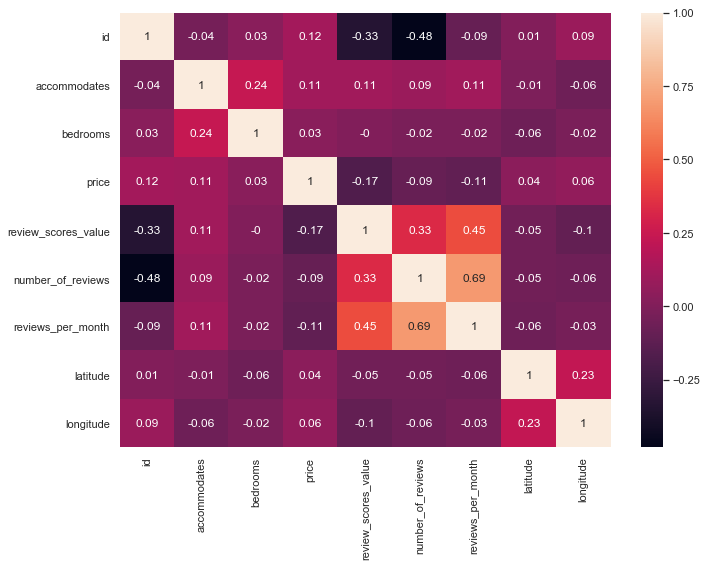

In [106]:
# use the heatmap function from seaborn to plot the correlation matrix
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(data=corr, annot=True)

For finding the dependency of price on overall satisfaction level

In [99]:
new_airb.price.describe()

count    20837.000000
mean       134.065364
std        381.207575
min          8.000000
25%         40.000000
50%         65.000000
75%        100.000000
max       9999.000000
Name: price, dtype: float64

In [100]:
new_airb.review_scores_value.describe()

count    20837.000000
mean         6.997264
std          4.010646
min          0.000000
25%          6.000000
50%          9.000000
75%         10.000000
max         10.000000
Name: review_scores_value, dtype: float64